# Unsupervised Learning:
# KMeans==> Clustering

### Apply KMeans clustering on the Employee_income.xlsx dataset and identify exact clusters using Elbow method to model the algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler #[0 to 1/-1 to 1]

from sklearn.cluster import KMeans

In [2]:
#load data
df = pd.read_excel('Employee_income.xlsx')

In [3]:
df.head()

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000
3,Anita,28,62000
4,Sudhir,42,155000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>]], dtype=object)

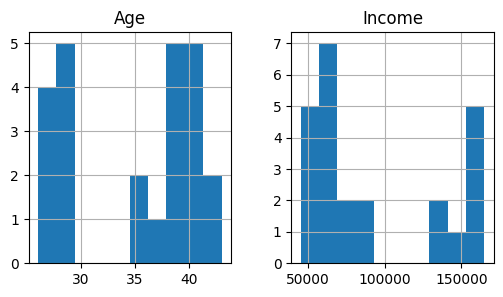

In [ ]:
df.hist(figsize=(6,3))

In [4]:
X = df[['Age','Income']]

In [5]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,24.0,34.916667,5.933814,26.0,28.75,37.5,40.0,43.0
Income,24.0,92104.166667,44673.204489,45000.0,58000.00,67000.0,139000.0,165000.0


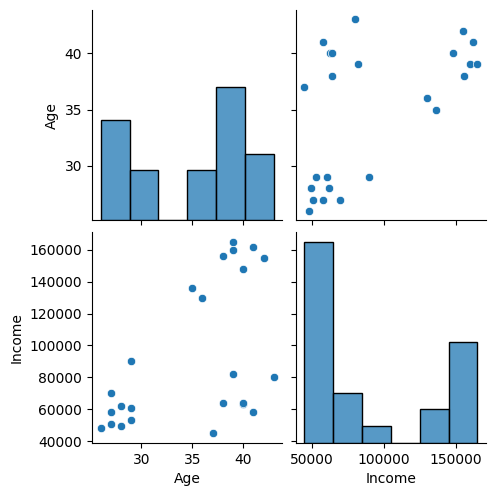

In [ ]:
import seaborn as sns
sns.pairplot(X)

In [6]:
from sklearn.cluster import KMeans

In [7]:
# default Kmeans has n_clusters=8,
# choose 3 cluster
model = KMeans(n_clusters=3)

In [ ]:
model

KMeans(n_clusters=3)

In [ ]:
#training: only X is used
model.fit(X)

KMeans(n_clusters=3)

In [ ]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


In [ ]:
len(X)

24

In [ ]:
model.labels_ # output clusters/Cluster number

# here 0 Cluster _1,1 means cluster_2, 2 means cluster_3

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       2, 1], dtype=int32)

In [ ]:
model.predict([[20,8000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [ ]:
model

KMeans(n_clusters=3)

In [ ]:
# 3 centroids= 3 Clusters
model.cluster_centers_

array([[3.4500e+01, 8.0500e+04],
       [3.8750e+01, 1.5150e+05],
       [3.2500e+01, 5.6375e+04]])

In [ ]:
model.cluster_centers_[:,0] #age data

array([34.5 , 38.75, 32.5 ])

In [ ]:
model.cluster_centers_[:,1] #income data

array([ 80500., 151500.,  56375.])

Text(0, 0.5, 'Income')

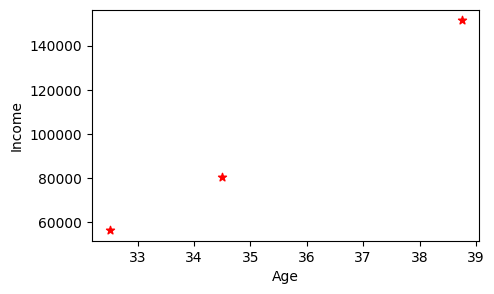

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*')
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:
#Testing phase
model.fit_predict(X)

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       1, 0], dtype=int32)

In [8]:
# create a copy
x_new = X.copy()

In [ ]:
X[:2]

,Age,Income
0,27,70000
1,29,90000


In [ ]:
X['cluster']= model.fit_predict(X)

In [ ]:
X[:3]

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0


In [ ]:
X.shape

In [ ]:
# Create separate dataframes for each cluster
df1 = X[X['cluster']==0]
df2 = X[X['cluster']==1]
df3 = X[X['cluster']==2]

In [ ]:
df1

,Age,Income,cluster
2,29,61000,0
3,28,62000,0
10,37,45000,0
11,26,48000,0
12,27,51000,0
13,28,49500,0
14,29,53000,0
16,40,63000,0
17,40,64000,0
20,41,58000,0


In [ ]:
# Another approach to select the dataframe using the cluster value
X.groupby('cluster').get_group(1)

In [ ]:
df1

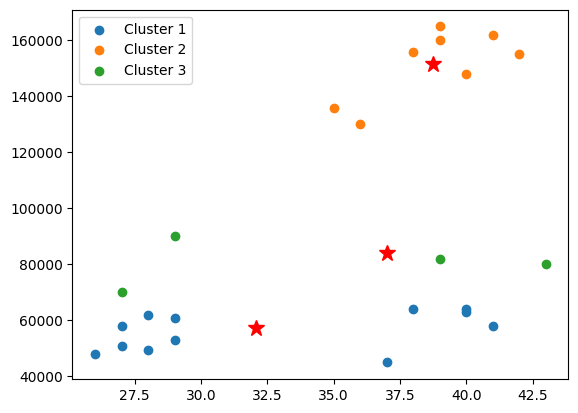

In [ ]:
# Input data
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1') #0
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')# 1
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')# 2
# Cluster centroids
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*',markersize=12,linestyle=' ')
plt.legend()

In [ ]:
p1 = (30,160000)
c1 = (35,60000)
# Ecludian distance: sqrt((35-30)^2 + (60000-160000)^2)

In [ ]:
import math
math.sqrt((35-30)**2 + (60000-160000)**2)

100000.000125

In [ ]:
X[:3]

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0


In [ ]:
(39 - 21)/(40-21)

In [9]:
#Scaling is required for age and Income also
# from sklearn.preprocessing import MinMaxScalar
scaler = MinMaxScaler() #normalizer [0-1]
# mimax= X - min(x)/max(x)-min(x)
df['Income']=scaler.fit_transform(df[['Income']])


df['Age']=scaler.fit_transform(df[['Age']])

In [ ]:
df

,Name,Age,Income
0,Amit,0.058824,0.208333
1,Akash,0.176471,0.375000
2,Shriya,0.176471,0.133333
3,Anita,0.117647,0.141667
4,Sudhir,0.941176,0.916667
5,Gajanan,0.764706,0.958333
6,Ranjit,0.882353,0.975000
7,Jyotsna,0.705882,0.925000
8,Nitish,0.588235,0.708333
9,Onkar,0.529412,0.758333


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>]], dtype=object)

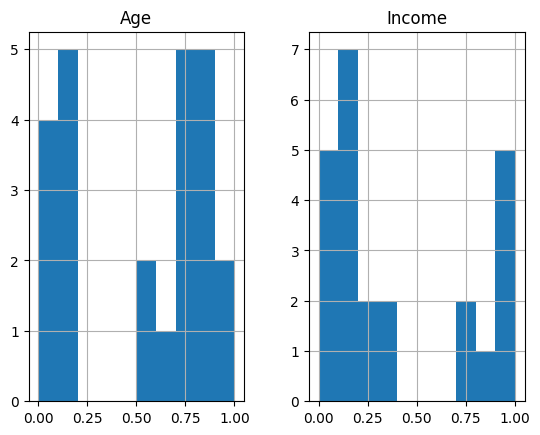

In [ ]:
df.hist()

In [10]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [11]:
# age and Income are now Normalized
y_pred = km.fit_predict(df[['Age','Income']])

In [ ]:
km.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 1], dtype=int32)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 1], dtype=int32)

In [ ]:
df[:2]

In [12]:
df['Cluster']=y_pred

In [ ]:
df[:3]

,Name,Age,Income,Cluster
0,Amit,0.058824,0.208333,0
1,Akash,0.176471,0.375000,0
2,Shriya,0.176471,0.133333,0


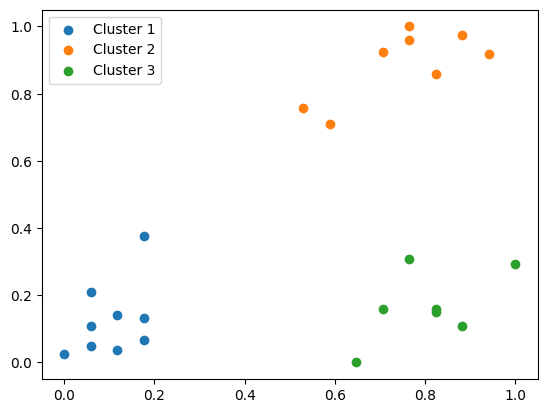

In [ ]:
#Plotting after scaling
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]


plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')
plt.legend()

In [ ]:
#check the centroids of cluster
km.cluster_centers_

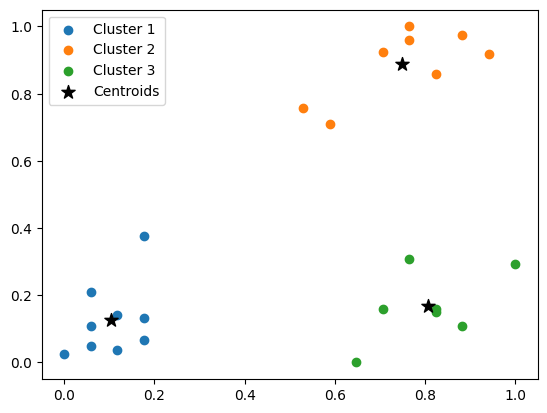

In [ ]:
#plotting of cluster data
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')

#plotting of cetroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,marker='*',color='black',label='Centroids')

plt.legend()

In [ ]:
df[:2]

,Name,Age,Income,Cluster
0,Amit,0.058824,0.208333,0
1,Akash,0.176471,0.375000,0


In [ ]:
km.predict([[25,56000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [ ]:
km.predict([[19,10000000]])
# remember at the time testing also u must have to scale data

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [ ]:
test_data = df[['Age','Income']].sample(5)
test_data

,Age,Income
21,0.705882,0.158333
4,0.941176,0.916667
8,0.588235,0.708333
15,0.764706,1.000000
19,0.764706,0.308333


In [ ]:
#with scaling data
km.predict(test_data)

array([2, 1, 1, 1, 2], dtype=int32)

In [ ]:
without_test = X.iloc[test_data.index,:-1]
without_test

,Age,Income
21,38,64000
4,42,155000
8,36,130000
15,39,165000
19,39,82000


In [ ]:
km.predict(without_test)

array([1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# now if we scale the data, it will give good result
km.predict(scaler.transform(without_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 2], dtype=int32)

# WCSS: WIthin Cluster Sum of Square

In [13]:
km

KMeans(n_clusters=3)

In [14]:
km.inertia_ #WCSS

0.4920193431403064

In [15]:
X = df[['Age','Income']]
X.head()

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000
2,0.176471,0.133333
3,0.117647,0.141667
4,0.941176,0.916667


In [16]:
wcss = []
for i in range(1,11):#i will take 1 to 10 cluster
    km = KMeans(n_clusters=i)
    km.fit(X)
    #print('Cluster:',i,km.inertia_)
    wcss.append(km.inertia_)

In [17]:
print(wcss)

[5.9897601858860385, 2.418831568520655, 0.4920193431403064, 0.331177199093145, 0.2999558739617852, 0.19373235103886324, 0.1625110259075035, 0.11815685924083684, 0.09349698483355756, 0.07281422710015377]


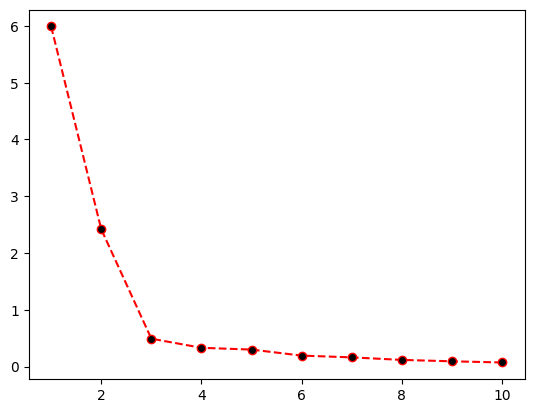

In [18]:
#check elbow- cluster vs wcss plot
plt.plot(range(1,11),wcss,linestyle='--',marker='o',color='r',mfc='k',markersize=6)

In [20]:
# To measure the performance of KMeans model use silhoutte_score
# silhouette score actually tells about how good clusters are
# it gives 3 values
# 0 - Not good means clusters are close to each other
# 1 - It indicates a Good cluster- means cluster are separate from each other
# -1 - Worst clustering bcz clusters are mixing
from sklearn.metrics import silhouette_score

In [21]:
X[:3]

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000
2,0.176471,0.133333


In [22]:
new = KMeans(n_clusters=3)

In [23]:
new.fit(X)

KMeans(n_clusters=3)

In [24]:
new.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 2], dtype=int32)

In [25]:
# to calculate sillhoute score we need input and its cluster number
silhouette_score(X,new.labels_)

np.float64(0.7261322509367406)

In [27]:
score = []
for i in range(2,20):
    new = KMeans(n_clusters=i)
    new.fit(X)
    print('Cluster:',i,'Score:',silhouette_score(X,new.labels_))

Cluster: 2 Score: 0.5371159667908988
Cluster: 3 Score: 0.7261322509367406
Cluster: 4 Score: 0.6179513263592575
Cluster: 5 Score: 0.5913755419172761
Cluster: 6 Score: 0.4776894740699508
Cluster: 7 Score: 0.44672570575188303
Cluster: 8 Score: 0.3041015221295018
Cluster: 9 Score: 0.3419929367695129
Cluster: 10 Score: 0.3198215724336751
Cluster: 11 Score: 0.26854916783801835
Cluster: 12 Score: 0.3006607620402512
Cluster: 13 Score: 0.3242119701857657
Cluster: 14 Score: 0.26287989310554033
Cluster: 15 Score: 0.223551955677424
Cluster: 16 Score: 0.22603248173649892
Cluster: 17 Score: 0.12643623350069189
Cluster: 18 Score: 0.19843366347136704
Cluster: 19 Score: 0.17414844880505295


In [28]:
X[:2]

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000


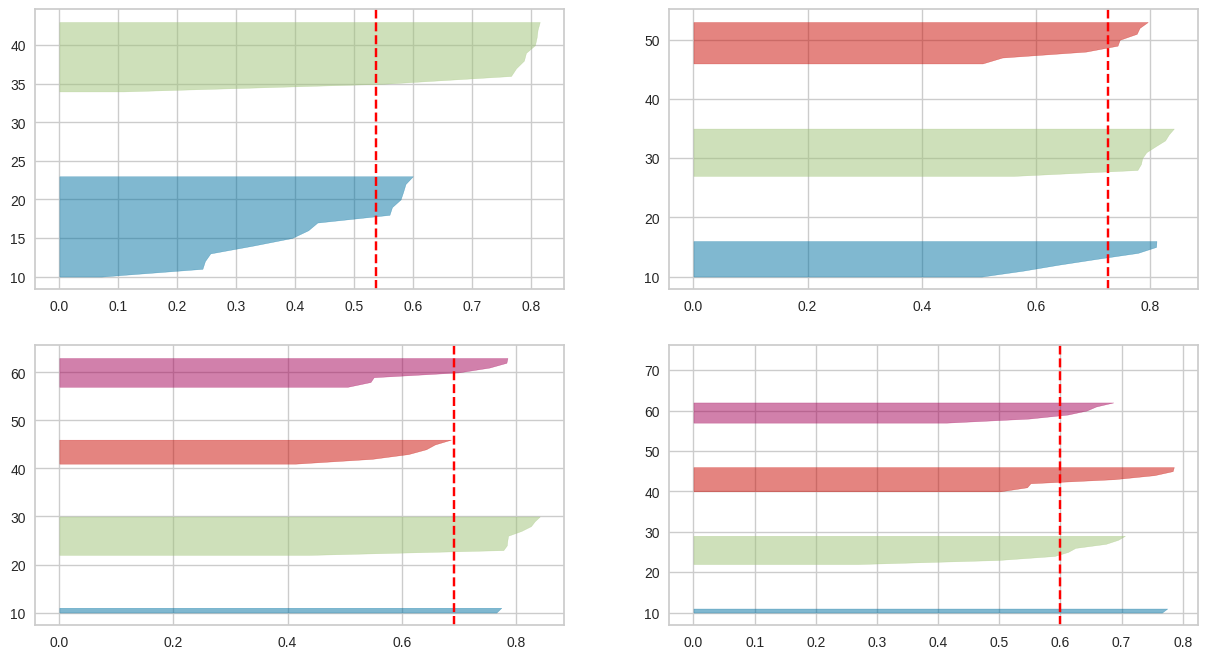

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

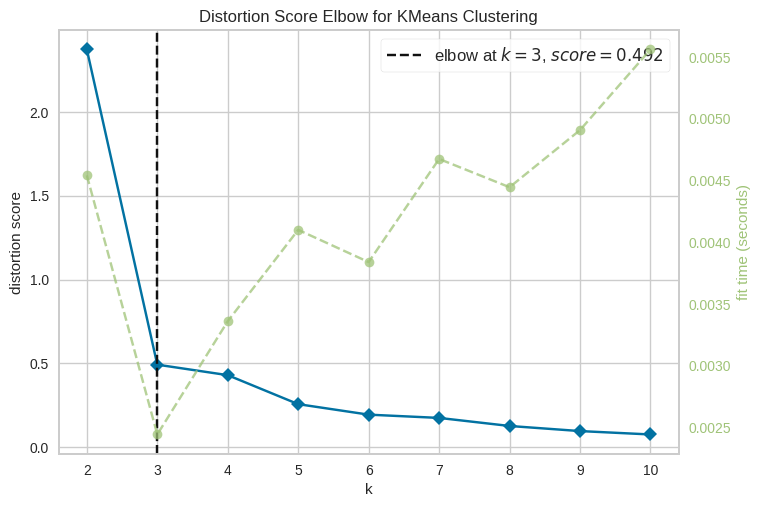

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [31]:
km

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=42)

In [32]:
silhouette_score(X,km.labels_)

np.float64(0.5989901496296245)

In [33]:
# Assignment: to Deploy this model using streamlit
X[:2]

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000


In [34]:
import pickle
pickle.dump(km,open('kmeans.pkl','wb'))

In [35]:
import sklearn
sklearn.__version__

'1.6.1'

In [36]:
scaler

MinMaxScaler()

In [37]:

pickle.dump(scaler,open('scaler.pkl','wb'))